In [30]:
# utility
import pandas as pd
import numpy as np

# plots
import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mean
# warnings
import warnings

# preprocessing and data clearning
from sklearn.preprocessing import PowerTransformer, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer


warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/avnyadav/sensor-fault-detection/main/aps_failure_training_set1.csv', na_values='na')

In [3]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


### Target Column -> **class**

In [4]:
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

##### define numerical & categorical columns

In [7]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

### Checking missing values

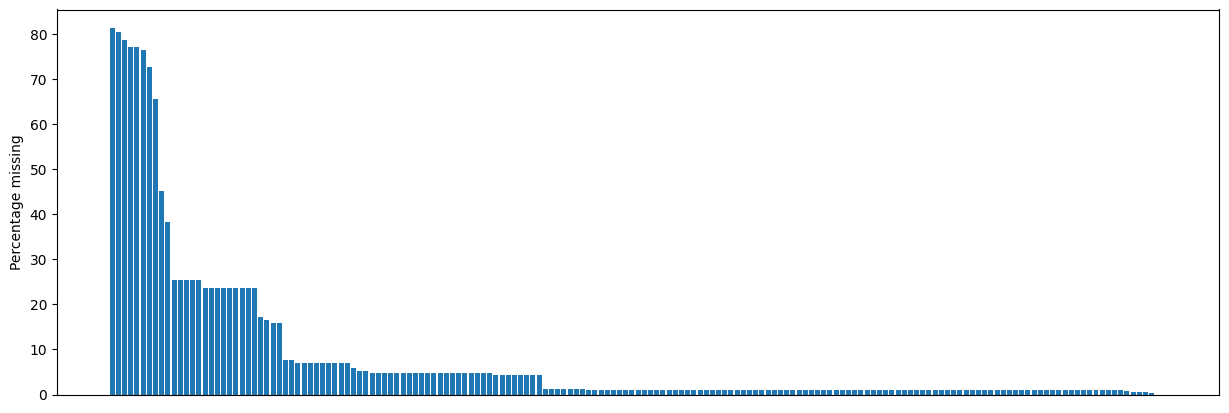

In [11]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [12]:
## Dropping columns which has more than 70% of missing values
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [13]:
df.drop(list(dropcols.index), axis=1, inplace=True)

In [14]:
# Check shape of the dataset after dropping columns
df.shape

(36188, 164)

In [20]:
missing_values_count= df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Percentage of total missing cells in the data {round((total_missing/total_cells),3) * 100}%")

Percentage of total missing cells in the data 5.4%


Positive: 1000, Negative: 35188


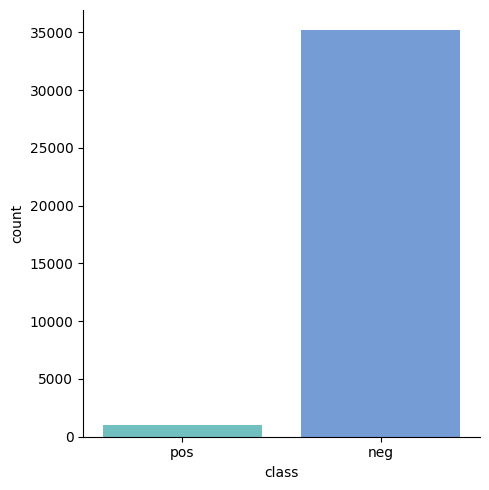

In [19]:
pos = df[df['class'] == 'pos'].shape[0]
neg = df[df['class'] == 'neg'].shape[0]

print("Positive: " + str(pos) + ", Negative: " + str(neg))

sns.catplot(data=df, x='class', kind='count', palette="winter_r", alpha=.6)
plt.show()

In [22]:
# function for model evalution
def evaluate_clf(true, predicted):
    '''
    Evaluate classifier performance based on true and predicted values.

    Parameters:
        true (array-like): Array of true labels.
        predicted (array-like): Array of predicted labels.

    Returns:
        tuple: A tuple containing Accuracy, F1-Score, Precision, Recall, and ROC-AUC Score.
    '''
    # Calculate Accuracy
    acc = accuracy_score(true, predicted)
    
    # Calculate F1-score
    f1 = f1_score(true, predicted)

    # Calculate Precision
    precision = precision_score(true, predicted)

    # Calculate Recall
    recall = recall_score(true, predicted) 

    # Calculate ROC-AUC Score
    roc_auc = roc_auc_score(true, predicted) 

    # Returning outputs
    return acc, f1, precision, recall, roc_auc


In [23]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    Calculate the total cost due to misclassification.

    Parameters:
        y_true (array-like): Array of true labels.
        y_pred (array-like): Array of predicted labels.

    Returns:
        float: Total cost calculated based on misclassification.
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10 * fp + 500 * fn
    return cost

### **Create a function which can evaluate models and return a report** 

In [24]:
# Model Evalution
def evaluate_models(X, y, models):
    '''
    Evaluate multiple models on a dataset.

    Parameters:
        X (array-like): Feature matrix.
        y (array-like): Target labels.
        models (dict): Dictionary containing model names as keys and model objects as values.

    Returns:
        DataFrame: Report containing model names and associated costs.
    '''
    # Split dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.20, 
                                                        random_state=42)
    
    # Lists to store model performance metrics
    cost_list = []
    models_list = []

    # Iterate over models
    for model_name, model in models.items():
        try:
            # Train model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Training set performance
            model_train_accuracy, model_train_f1, model_train_precision, \
            model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)
            train_cost = total_cost(y_train, y_train_pred)

            # Test set performance
            model_test_accuracy, model_test_f1, model_test_precision, \
            model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)
            test_cost = total_cost(y_test, y_test_pred)

            # Print model performance
            print(model_name)
            print('Model performance for Training set')
            print("- Accuracy: {:.4f}".format(model_train_accuracy))
            print('- F1 score: {:.4f}'.format(model_train_f1)) 
            print('- Precision: {:.4f}'.format(model_train_precision))
            print('- Recall: {:.4f}'.format(model_train_recall))
            print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
            print(f'- COST: {train_cost}.')

            print('--------------------' * 3)

            print('Model performance for Test set')
            print('- Accuracy: {:.4f}'.format(model_test_accuracy))
            print('- F1 score: {:.4f}'.format(model_test_f1))
            print('- Precision: {:.4f}'.format(model_test_precision))
            print('- Recall: {:.4f}'.format(model_test_recall))
            print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
            print(f'- COST: {test_cost}.')
            cost_list.append(test_cost)
            print('=' * 35)
            print('\n')

            models_list.append(model_name)

        except Exception as e:
            print(f"Error occurred while evaluating {model_name}: {e}")

    # Create a report DataFrame
    report = pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

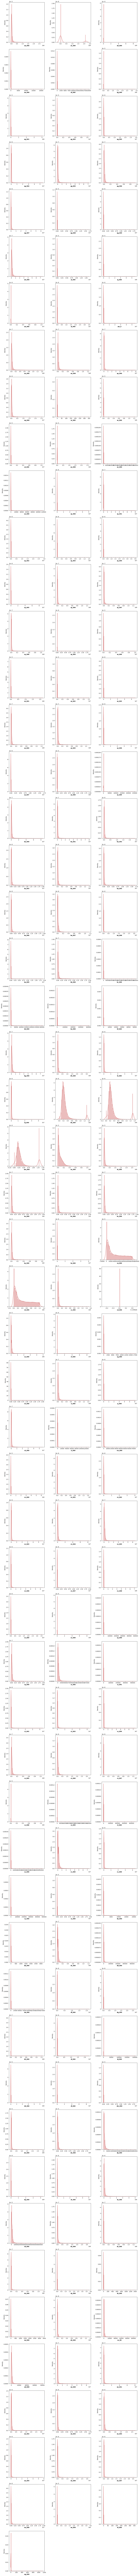

In [25]:
def plot_numeric_features_distribution(df):
    '''
    Plot the distribution of numeric features in a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame containing numeric features.

    Returns:
        None
    '''
    numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

    num_cols = len(numeric_features)
    num_rows = num_cols // 3 + (num_cols % 3 > 0)  # Calculate number of rows for subplots

    plt.figure(figsize=(15, num_rows * 5))  # Adjust figsize based on the number of features

    for i, col in enumerate(numeric_features):
        plt.subplot(num_rows, 3, i+1)
        sns.distplot(x=df[col], color='indianred')
        plt.xlabel(col, weight='bold')
        plt.tight_layout()

    plt.show()

plot_numeric_features_distribution(df)


### **Splitting a data**

In [26]:
# Splitting X and y for all Experiments

X = df.drop('class', axis=1)
y = df['class'] 

In [27]:
y = y.replace({'pos': 1,
               'neg': 0})

In [28]:
#fit = vlaue adjsut 
#transform = value transform 

In [29]:
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [31]:
def evaluate_imputer(X, y, n_neighbors_list=[1, 3, 5, 7, 9]):
    '''
    Evaluate KNNImputer with different numbers of neighbors and Logistic Regression.

    Parameters:
        X (array-like): Feature matrix.
        y (array-like): Target labels.
        n_neighbors_list (list): List of integers representing the number of neighbors.

    Returns:
        list: List of accuracy scores for each combination of n_neighbors.
    '''
    results = []

    for n_neighbors in n_neighbors_list:
        imputer = KNNImputer(n_neighbors=n_neighbors, weights='uniform', metric='nan_euclidean')
        pipeline = Pipeline(steps=[('imputer', imputer), ('model', LogisticRegression())])
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=2, n_jobs=-1)
        results.append(scores)
        print('n_neighbors=%s || accuracy (%.4f)' % (n_neighbors, mean(scores)))

    return results


results = evaluate_imputer(X1, y)
results

n_neighbors=1 || accuracy (0.7501)
n_neighbors=3 || accuracy (0.7146)
n_neighbors=5 || accuracy (0.7187)
n_neighbors=7 || accuracy (0.7118)
n_neighbors=9 || accuracy (0.7212)


[array([0.71885708, 0.78125345]),
 array([0.70095059, 0.72830773]),
 array([0.71034597, 0.72698132]),
 array([0.71239085, 0.71128551]),
 array([0.69951365, 0.74284293])]